## Building a Perceptron based classifier

In [1]:
pip install neurolab

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

In [3]:
# Load input data
text = np.loadtxt('data_perceptron.txt')

In [4]:
# Separate text into datapoints and labels
data = text[:, :2]
labels = text[:, 2].reshape((text.shape[0], 1))

Text(0.5, 1.0, 'Input Data')

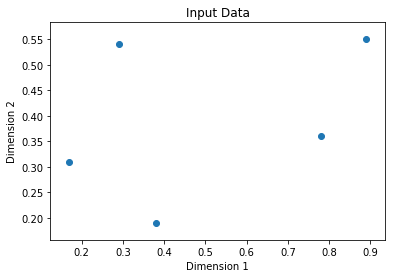

In [5]:
# Plot the datapoints
plt.figure()
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input Data')

In [6]:
# Define minimum and maximum values for each dimension
dim1_min, dim1_max, dim2_min, dim2_max = 0, 1, 0, 1

In [7]:
num_output = labels.shape[1]

In [8]:
# Define a perceptron with 2 input neurons
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
perceptron = nl.net.newp([dim1, dim2], num_output)

In [9]:
# Train the perceptron with the training data
error_progress = perceptron.train(data, labels, epochs=100, show=20, lr=0.03) #lr = learning rate

The goal of learning is reached


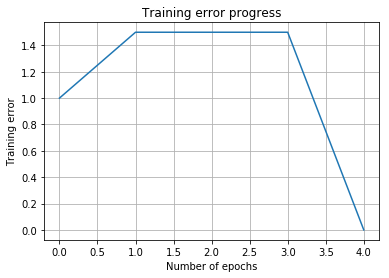

In [10]:
# Plot the training progress
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.title('Training error progress')
plt.grid()

## Constructing a single layer neural network

In [11]:
# Load input data
text = np.loadtxt('data_simple_nn.txt')

In [12]:
# Separate into datapoints and labels
data = text[:, :2]
labels = text[:, 2:]

Text(0.5, 1.0, 'Input data: simple NN')

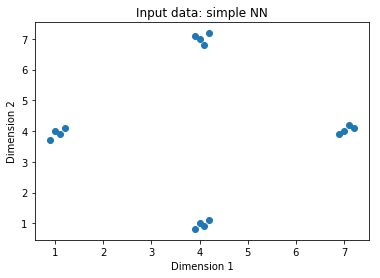

In [13]:
# Plot input data

plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data: simple NN')

In [14]:
# Extract minimum and maximum values for each  dimension
dim1_min, dim1_max = data[:, 0].min(), data[:, 0].max()
dim2_min, dim2_max = data[:, 1].min(), data[:, 1].max()

In [15]:
# Define number of neurons in the output layer
num_output = labels.shape[1]

In [16]:
# Define a single-layer neural network using above parameters
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
nn = nl.net.newp([dim1, dim2], num_output)

In [17]:
# Train the neural network using training data
error_progress = nn.train(data, labels, epochs=100, show=20, lr=0.03)

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
Epoch: 60; Error: 4.0;
Epoch: 80; Error: 4.0;
Epoch: 100; Error: 4.0;
The maximum number of train epochs is reached


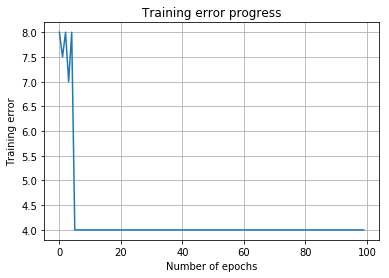

In [18]:
# Plot the training progress
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.title('Training error progress')
plt.grid()

In [19]:
# Run the classifier on sample test datapoints
print('\nTest results:')
data_test = [[0.4, 4.3], [4.4, 0.6], [4.7, 8.1]]
for item in data_test:
    print(item, '-->', nn.sim([item])[0])


Test results:
[0.4, 4.3] --> [0. 0.]
[4.4, 0.6] --> [1. 0.]
[4.7, 8.1] --> [1. 1.]


## Constructing a multilayer neural network

In [20]:
# Generate some training data
min_val = -15
max_val = 15
num_points = 130
x = np.linspace(min_val, max_val, num_points)
y = 3 * np.square(x) + 5
y /= np.linalg.norm(y)

In [21]:
# Reshape above variables to create training dataset
data = x.reshape(num_points, 1)
labels = y.reshape(num_points, 1)

Text(0.5, 1.0, 'Input data')

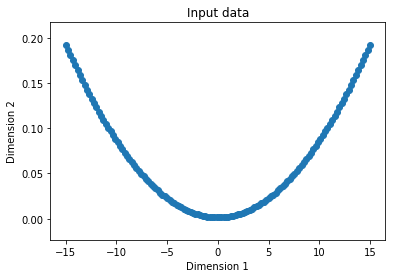

In [22]:
# Plot the created input data
plt.scatter(data, labels)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data')

In [23]:
# Define a multilayer neural network with 2 hidden layers;
# First hidden layer consists of 10 neurons
# Second hidden layer consists of 6 neurons
# Output layer consists of 1 neuron as our task is to predict the value
nn = nl.net.newff([[min_val, max_val]], [10, 6, 1])

In [24]:
# Set the training algorithm to gradient descent
nn.trainf = nl.train.train_gd

In [25]:
# Train the neural network
error_progress = nn.train(data, labels, epochs=2000, show=100, goal=0.005)

Epoch: 100; Error: 0.011745127904548715;
Epoch: 200; Error: 0.0067542915814068315;
Epoch: 300; Error: 0.0051141618365662615;
The goal of learning is reached


In [26]:
# Run the neural network on training datapoints
output = nn.sim(data)
y_pred = output.reshape(num_points)

Text(0.5, 1.0, 'Training error progress')

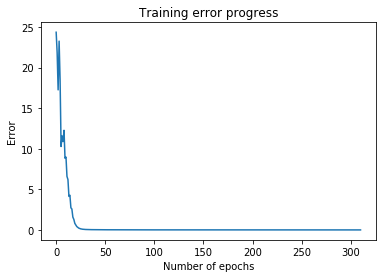

In [27]:
# Plot the training error progress

plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Training error progress')

Text(0.5, 1.0, 'Actual vs predicted')

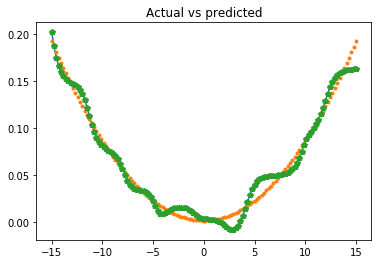

In [28]:
# Plot the predicted output
x_dense = np.linspace(min_val, max_val, num_points * 2)
y_dense_pred = nn.sim(x_dense.reshape(x_dense.size, 1)).reshape(x_dense.size)
plt.plot(x_dense, y_dense_pred, '-', x, y, '.', x, y_pred, 'p')
plt.title('Actual vs predicted')

## Building a vector quantizer

In [29]:
# Load input data.

text = np.loadtxt('data_vector_quantization.txt')

In [30]:
# Separate into data and labels
data = text[:, 0:2]
labels = text[:, 2:]

In [40]:
# Define a neural network with 2 layers:
# 10 neurons in input layer and 4 neurons in output layer
num_input_neurons = 10
num_output_neurons = 4
weights = [1/num_output_neurons] * num_output_neurons
minmax = nl.tool.minmax(data)
x1 = int(minmax[0][0])
y1 = int(minmax[0][1])
x2 = int(minmax[1][0])
y2 = int(minmax[1][1])
minmax = ((x1,y1),(x2,y2))
nn = nl.net.newlvq(nl.tool.minmax(data), num_input_neurons, weights)

In [41]:
# Train the neural network
_ = nn.train(data, labels, epochs=500, goal=-1)

# Create the input grid to visualize the output clusters
xx, yy = np.meshgrid(np.arange(0, 10, 0.2), np.arange(0, 10, 0.2))
xx.shape = xx.size, 1
yy.shape = yy.size, 1
grid_xy = np.concatenate((xx, yy), axis=1)

# Evaluate the input grid of points using the neural network
grid_eval = nn.sim(grid_xy)

Epoch: 100; Error: 0.0;
Epoch: 200; Error: 0.0;
Epoch: 300; Error: 0.0;
Epoch: 400; Error: 0.0;
Epoch: 500; Error: 0.0;
The maximum number of train epochs is reached


In [42]:
# Define the 4 classes
class_1 = data[labels[:,0] == 1]
class_2 = data[labels[:,1] == 1]
class_3 = data[labels[:,2] == 1]
class_4 = data[labels[:,3] == 1]

# Define X-Y grids for all the 4 classes
grid_1 = grid_xy[grid_eval[:,0] == 1]
grid_2 = grid_xy[grid_eval[:,1] == 1]
grid_3 = grid_xy[grid_eval[:,2] == 1]
grid_4 = grid_xy[grid_eval[:,3] == 1]

Text(0.5, 1.0, 'Vector quantization')

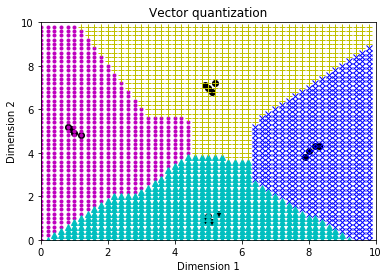

In [43]:
# Plot the outputs

plt.plot(class_1[:,0], class_1[:,1], 'ko', 
        class_2[:,0], class_2[:,1], 'ko', 
        class_3[:,0], class_3[:,1], 'ko', 
        class_4[:,0], class_4[:,1], 'ko')
plt.plot(grid_1[:,0], grid_1[:,1], 'm.',
        grid_2[:,0], grid_2[:,1], 'bx',
        grid_3[:,0], grid_3[:,1], 'c^', 
        grid_4[:,0], grid_4[:,1], 'y+')
plt.axis([0, 10, 0, 10])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Vector quantization')

## Analyzing sequential data using recurrent neural networks

We have been dealing with static data so far. Artificial neural networks are good at building models for sequential data too. In particular, recurrent neural networks are great at modeling sequential data. Perhaps time-series data is the most commonly occurring form of sequential data in our world. We can learn more about recurrent neural networks [here](http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns). When we are working with time-series data, we cannot just use generic learning models. We need to characterize the temporal dependencies in our data so that we can build a robust model.

In [44]:
# Define a function to generate waveforms using for sine waves:
def get_data(num_points):
    # Create sine waveforms
    wave_1 = 0.5 * np.sin(np.arange(0, num_points))
    wave_2 = 3.6 * np.sin(np.arange(0, num_points))
    wave_3 = 1.1 * np.sin(np.arange(0, num_points))
    wave_4 = 4.7 * np.sin(np.arange(0, num_points))
    
    # Create varying amplitudes for the overall waveform:
    amp_1 = np.ones(num_points)
    amp_2 = 2.1 + np.zeros(num_points)
    amp_3 = 3.2 * np.ones(num_points)
    amp_4 = 0.8 + np.zeros(num_points)
    
    # Create the overall waveform:
    wave = np.array([wave_1, wave_2, wave_3, wave_4]).reshape(num_points * 4, 1)
    amp = np.array([[amp_1, amp_2, amp_3, amp_4]]).reshape(num_points * 4, 1)
    
    return wave, amp

In [45]:
# Define function to visualize the output of NN:
def visualize_output(nn, num_points_test):
    wave, amp = get_data(num_points_test)
    output = nn.sim(wave)
    plt.plot(amp.reshape(num_points_test * 4))
    plt.plot(output.reshape(num_points_test * 4))

In [46]:
# Create some sample data and waveform
num_points = 40
wave, amp = get_data(num_points)

# Create a recurrent neural network with 2 layers
nn = nl.net.newelm([[-2, 2]], [10, 1], [nl.trans.TanSig(), nl.trans.PureLin()]) # elm: Elman Recurrent Network

# Set the init functions for each layer 
nn.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
nn.layers[1].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
nn.init()

# Train the recurrent neural network
error_progress = nn.train(wave, amp, epochs=1200, show=100, goal=0.01)

# Run the training data through the network
output = nn.sim(wave)

Epoch: 100; Error: 0.8409632512883037;
Epoch: 200; Error: 0.8173868707144907;
Epoch: 300; Error: 0.7397281510671208;
Epoch: 400; Error: 0.6199084846959908;
Epoch: 500; Error: 0.5736323866913278;
Epoch: 600; Error: 0.14998168196950237;
Epoch: 700; Error: 0.0733960212685986;
Epoch: 800; Error: 0.06150572617710224;
Epoch: 900; Error: 0.06693091935101922;
Epoch: 1000; Error: 0.05439724277784649;
Epoch: 1100; Error: 0.05351201860417978;
Epoch: 1200; Error: 0.08549719246828665;
The maximum number of train epochs is reached


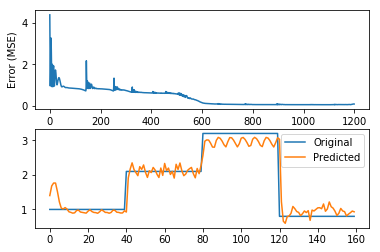

In [47]:
# Plot the results
plt.subplot(211)
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Error (MSE)') # MSE: Mean Squared Error
plt.subplot(212)
plt.plot(amp.reshape(num_points * 4))
plt.plot(output.reshape(num_points * 4))
plt.legend(['Original', 'Predicted'])

(0, 300)

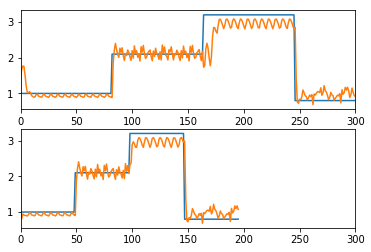

In [48]:
# Testing the neural network performance on unknown data

plt.subplot(211)
visualize_output(nn, 82)
plt.xlim([0, 300])
plt.subplot(212)
visualize_output(nn, 49)
plt.xlim([0, 300])

## Visualizing characters in an Optical Character Recognition database

In [49]:
import os
import sys

import cv2

In [50]:
# Define input file containing the OCR data
input_file = 'letter.data'

In [51]:
# Define visualization and other parameters required to load the data
img_resize_factor = 12
start = 6
end = -1
height, width = 16, 8

In [ ]:
# Iterate until the user presses the Esc key
with open(input_file, 'r') as f:
    for line in f.readlines():
        # Read the data
        data = np.array([255 * float(x) for x in line.split('\t')[start:end]])

        # Reshape the data into a 2D image
        img = np.reshape(data, (height, width))

        # Scale the image
        img_scaled = cv2.resize(img, None, fx=img_resize_factor, fy=img_resize_factor)

        # Display the image
        cv2.imshow('Image', img_scaled)

        # Check if the user pressed the Esc key
        c = cv2.waitKey()
        if c == 27:
            break

## Building an Optical Character Recognition engine

In [54]:
import numpy as np
import neurolab as nl

In [55]:
# Define input file
input_file = 'letter.data'
# Define number of datapoints to be loaded from the input file
num_datapoints = 50
# Define the string containing all the distinct characters:
orig_labels = 'omandig'
# Compute number of distinct characters/classes
num_orig_labels = len(orig_labels)

In [56]:
# Define the train and test split. 90% for training 10% for testing
num_train = int(0.9 * num_datapoints)
num_test = num_datapoints - num_train

In [57]:
# Define the dataset extraction parameters
start = 6
end = -1

In [58]:
# Creating the dataset
data = []
labels = []
with open (input_file, 'r') as f:
    for line in f.readlines():
        # Split the current line tabwise
        list_vals = line.split('\t')
        # Check if label is in our ground truth labels. If not, we should skip it.
        if list_vals[1] not in orig_labels:
            continue
        # Extract the current label and append it to the main list
        label = np.zeros((num_orig_labels, 1))
        label[orig_labels.index(list_vals[1])] = 1
        labels.append(label)
        # Extract the character vector and append it to the main list
        cur_char = np.array([float(x) for x in list_vals[start:end]])
        data.append(cur_char)
        # Exit the loop once the required dataset has been created
        if len(data) >= num_datapoints:
            break

# Convert the lists into numpy arrays
data = np.asfarray(data)
labels = np.array(labels).reshape(num_datapoints, num_orig_labels)

# Extract the number of dimensions
num_dims = len(data[0])

In [59]:
# Create a feedforward neural network
nn = nl.net.newff([[0, 1] for _ in range(len(data[0]))], [128, 16, num_orig_labels])

# Set the training algorithm to gradient descent
nn.trainf = nl.train.train_gd

In [60]:
# Train the network
error_progress = nn.train(data[:num_train,:], labels[:num_train,:], epochs=10000, show=100, goal=-1)

Epoch: 100; Error: 54.46023011023223;
Epoch: 200; Error: 22.990576967857237;
Epoch: 300; Error: 12.249261607228652;
Epoch: 400; Error: 9.761008355230908;
Epoch: 500; Error: 11.185757301125184;
Epoch: 600; Error: 5.637693741119158;
Epoch: 700; Error: 2.4622193465652797;
Epoch: 800; Error: 1.3740020862126539;
Epoch: 900; Error: 0.9779999886805435;
Epoch: 1000; Error: 1.0979652043547055;
Epoch: 1100; Error: 0.8491850465247295;
Epoch: 1200; Error: 0.9291633014985983;
Epoch: 1300; Error: 0.4926311568504701;
Epoch: 1400; Error: 0.35009808033762996;
Epoch: 1500; Error: 0.26412752673510015;
Epoch: 1600; Error: 0.22532273418408427;
Epoch: 1700; Error: 0.10326293308397341;
Epoch: 1800; Error: 0.21424432825102546;
Epoch: 1900; Error: 0.1289010153774812;
Epoch: 2000; Error: 0.09263354339986832;
Epoch: 2100; Error: 0.09374817859048215;
Epoch: 2200; Error: 0.07384991818237148;
Epoch: 2300; Error: 0.07819489804780527;
Epoch: 2400; Error: 0.05524347005319559;
Epoch: 2500; Error: 0.030668650642471942;


In [61]:
# Predict the output for test inputs 
print('\nTesting on unknown data:')
predicted_test = nn.sim(data[num_train:, :])
for i in range(num_test):
    print('\nOriginal:', orig_labels[np.argmax(labels[i])])
    print('Predicted:', orig_labels[np.argmax(predicted_test[i])])


Testing on unknown data:

Original: o
Predicted: o

Original: m
Predicted: n

Original: m
Predicted: n

Original: a
Predicted: n

Original: n
Predicted: n


## Long Short-term Memory (LSTM)

In [63]:
pip install keras

     |████████████████████████████████| 378kB 21kB/s eta 0:00:016
Note: you may need to restart the kernel to use updated packages.


In [64]:
import numpy as np
np.random.seed(2017)
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, SpatialDropout1D
from keras.layers import LSTM
from keras.datasets import imdb

Using TensorFlow backend.


In [65]:
max_features = 20000
maxlen = 80  
batch_size = 32

# Load data
print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Loading data...
 6250496/17464789 [=========>....................] - ETA: 14:04

ConnectionResetError: [Errno 104] Connection reset by peer

In [ ]:
# Model configuration
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2)) 
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train
model.fit(X_train, y_train, batch_size=batch_size, epochs=5, validation_data=(X_test, y_test))

In [ ]:
train_score, train_acc = model.evaluate(X_train, y_train, batch_size=batch_size)
test_score, test_acc = model.evaluate(X_test, y_test, batch_size=batch_size)

print('Train score:', train_score)
print('Train accuracy:', train_acc)

print('Test score:', test_score)
print('Test accuracy:', test_acc)

## Transfer Learning

In [ ]:
import numpy as np
np.random.seed(2017)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [ ]:
batch_size = 128
nb_classes = 5
nb_epoch = 5

# input image dimensions
img_rows, img_cols = 28, 28

# number of convolutional filters to use
nb_filters = 32

# size of pooling area for max pooling
pool_size = 2

# convolution kernel size
kernel_size = 3

input_shape = (img_rows, img_cols, 1)

In [ ]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# create two datasets one with digits below 5 and one with 5 and above
X_train_lt5 = X_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]
X_test_lt5 = X_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]

X_train_gte5 = X_train[y_train >= 5]
y_train_gte5 = y_train[y_train >= 5] - 5  # make classes start at 0 for
X_test_gte5 = X_test[y_test >= 5]         # np_utils.to_categorical
y_test_gte5 = y_test[y_test >= 5] - 5

In [ ]:
# Train model for digits 0 to 4
def train_model(model, train, test, nb_classes):
    X_train = train[0].reshape((train[0].shape[0],) + input_shape)
    X_test = test[0].reshape((test[0].shape[0],) + input_shape)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    print('X_train shape:', X_train.shape)
    print(X_train.shape[0], 'train samples')
    print(X_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    Y_train = np_utils.to_categorical(train[1], nb_classes)
    Y_test = np_utils.to_categorical(test[1], nb_classes)

    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])

    model.fit(X_train, Y_train,
              batch_size=batch_size, nb_epoch=nb_epochs,
              verbose=1,
              validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

In [ ]:
# define two groups of layers: feature (convolutions) and classification (dense)
feature_layers = [
    Convolution2D(nb_filters, (kernel_size, kernel_size),
                  input_shape=input_shape),
    Activation('relu'),
    Convolution2D(nb_filters, (kernel_size, kernel_size)),
    Activation('relu'),
    MaxPooling2D(pool_size=(pool_size, pool_size)),
    Dropout(0.25),
    Flatten(),
]
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(nb_classes),
    Activation('softmax')
]

# create complete model
model = Sequential(feature_layers + classification_layers)

# train model for 5-digit classification [0..4]
train_model(model, (X_train_lt5, y_train_lt5), (X_test_lt5, y_test_lt5), nb_classes)

In [ ]:
# freeze feature layers and rebuild model
for layer in feature_layers:
    layer.trainable = False

# transfer: train dense layers for new classification task [5..9]
train_model(model, (X_train_gte5, y_train_gte5), (X_test_gte5, y_test_gte5), nb_classes)